In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
df_excel = pd.read_excel(r"E:/LABMENTICX_PROJECT/PROJECT_7/OLA_RIDE_INSIGHTS/OLA_DataSet.xlsx", sheet_name = 'July')
print(df_excel)

                      Date      Time     Booking_ID        Booking_Status  \
0      2024-07-26 14:00:00  14:00:00  CNR7153255142    Canceled by Driver   
1      2024-07-25 22:20:00  22:20:00  CNR2940424040               Success   
2      2024-07-30 19:59:00  19:59:00  CNR2982357879               Success   
3      2024-07-22 03:15:00  03:15:00  CNR2395710036  Canceled by Customer   
4      2024-07-02 09:02:00  09:02:00  CNR1797421769               Success   
...                    ...       ...            ...                   ...   
103019 2024-07-31 09:06:00  09:06:00  CNR9488489435               Success   
103020 2024-07-31 15:12:00  15:12:00  CNR3151743100               Success   
103021 2024-07-31 13:59:00  13:59:00  CNR1286151233               Success   
103022 2024-07-31 14:56:00  14:56:00  CNR2027162035               Success   
103023 2024-07-31 13:57:00  13:57:00  CNR9770709721               Success   

       Customer_ID Vehicle_Type    Pickup_Location  Drop_Location  V_TAT  \

In [17]:
import time
start = time.perf_counter()

df_ola = r"E:\LABMENTICX_PROJECT\PROJECT_7\OLA_RIDE_INSIGHTS\OLA_DataSet_July.csv"
df_excel.to_csv(df_ola, index=False)

elapsed = time.perf_counter() - start
print(f"Saved CSV: {df_ola}  rows={len(df_excel)}  read+write time={elapsed:.2f}s")


Saved CSV: E:\LABMENTICX_PROJECT\PROJECT_7\OLA_RIDE_INSIGHTS\OLA_DataSet_July.csv  rows=103024  read+write time=5.15s


In [3]:
df = pd.read_csv(r"E:\LABMENTICX_PROJECT\PROJECT_7\OLA_RIDE_INSIGHTS\OLA_DataSet_July.csv")

In [21]:
df.head(5)

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...


In [22]:
df.shape

(103024, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        103024 non-null  object 
 1   Time                        103024 non-null  object 
 2   Booking_ID                  103024 non-null  object 
 3   Booking_Status              103024 non-null  object 
 4   Customer_ID                 103024 non-null  object 
 5   Vehicle_Type                103024 non-null  object 
 6   Pickup_Location             103024 non-null  object 
 7   Drop_Location               103024 non-null  object 
 8   V_TAT                       63967 non-null   float64
 9   C_TAT                       63967 non-null   float64
 10  Canceled_Rides_by_Customer  10499 non-null   object 
 11  Canceled_Rides_by_Driver    18434 non-null   object 
 12  Incomplete_Rides            63967 non-null   object 
 13  Incomplete_Rid

In [5]:
# finding the unique values in those columns.
print("--- Canceled_Rides_by_Customer ---")
print(df['Canceled_Rides_by_Customer'].value_counts(dropna=False))
print("\n" + "="*40 + "\n")

print("--- Canceled_Rides_by_Driver ---")
print(df['Canceled_Rides_by_Driver'].value_counts(dropna=False))
print("\n" + "="*40 + "\n")

print("--- Incomplete_Rides ---")
print(df['Incomplete_Rides'].value_counts(dropna=False))

--- Canceled_Rides_by_Customer ---
Canceled_Rides_by_Customer
NaN                                             92525
Driver is not moving towards pickup location     3175
Driver asked to cancel                           2670
Change of plans                                  2081
AC is Not working                                1568
Wrong Address                                    1005
Name: count, dtype: int64


--- Canceled_Rides_by_Driver ---
Canceled_Rides_by_Driver
NaN                                    84590
Personal & Car related issue            6542
Customer related issue                  5413
Customer was coughing/sick              3654
More than permitted people in there     2825
Name: count, dtype: int64


--- Incomplete_Rides ---
Incomplete_Rides
No     60041
NaN    39057
Yes     3926
Name: count, dtype: int64


In [6]:
# Handle 'Incomplete_Rides'.
# Map 'Yes' to 1, 'No' to 0, and fill any missing values (NaN) with 0.
df['Incomplete_Rides'] = df['Incomplete_Rides'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
print(df['Incomplete_Rides'])

0         0
1         0
2         0
3         0
4         0
         ..
103019    0
103020    0
103021    0
103022    0
103023    0
Name: Incomplete_Rides, Length: 103024, dtype: int64


In [7]:
# Handle 'Canceled_Rides_by_Customer'
# This creates the new binary column 'Is_Canceled_by_Customer' (1 if canceled, 0 if not).
df['Is_Canceled_by_Customer'] = df['Canceled_Rides_by_Customer'].notna().astype(int)
# This fills the missing reasons in the original column with "Not Canceled".
df['Canceled_Rides_by_Customer'].fillna('Not Canceled', inplace=True)


In [8]:
#Handle 'Canceled_Rides_by_Driver'
# This creates the new binary column 'Is_Canceled_by_Driver' (1 if canceled, 0 if not).
df['Is_Canceled_by_Driver'] = df['Canceled_Rides_by_Driver'].notna().astype(int)
# This fills the missing reasons in the original column with "Not Canceled".
df['Canceled_Rides_by_Driver'].fillna('Not Canceled', inplace=True)

In [9]:
# 4. Rename the columns for better clarity
df.rename(columns={
    'Incomplete_Rides': 'IsIncomplete',
    'Canceled_Rides_by_Customer': 'Customer_Cancellation_Reason',
    'Canceled_Rides_by_Driver': 'Driver_Cancellation_Reason'
}, inplace=True)

In [10]:
# displays the first few rows of the transformed columns to check the result.
print(df[['IsIncomplete', 'Is_Canceled_by_Customer', 'Customer_Cancellation_Reason', 'Is_Canceled_by_Driver', 'Driver_Cancellation_Reason']].head())

   IsIncomplete  Is_Canceled_by_Customer  \
0             0                        0   
1             0                        0   
2             0                        0   
3             0                        1   
4             0                        0   

                   Customer_Cancellation_Reason  Is_Canceled_by_Driver  \
0                                  Not Canceled                      1   
1                                  Not Canceled                      0   
2                                  Not Canceled                      0   
3  Driver is not moving towards pickup location                      0   
4                                  Not Canceled                      0   

     Driver_Cancellation_Reason  
0  Personal & Car related issue  
1                  Not Canceled  
2                  Not Canceled  
3                  Not Canceled  
4                  Not Canceled  


In [11]:
print(df.isnull().sum())

Date                                0
Time                                0
Booking_ID                          0
Booking_Status                      0
Customer_ID                         0
Vehicle_Type                        0
Pickup_Location                     0
Drop_Location                       0
V_TAT                           39057
C_TAT                           39057
Customer_Cancellation_Reason        0
Driver_Cancellation_Reason          0
IsIncomplete                        0
Incomplete_Rides_Reason         99098
Booking_Value                       0
Payment_Method                  39057
Ride_Distance                       0
Driver_Ratings                  39057
Customer_Rating                 39057
Vehicle Images                      0
Is_Canceled_by_Customer             0
Is_Canceled_by_Driver               0
dtype: int64


In [ ]:
# Fill numerical columns with the median
numerical_cols = ['V_TAT', 'C_TAT', 'Driver_Ratings', 'Customer_Rating']
for col in numerical_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

In [13]:
# Fill the categorical column with the mode
mode_val = df['Payment_Method'].mode()[0]
df['Payment_Method'].fillna(mode_val, inplace=True)

In [14]:
# Fill the reason column with a placeholder
df['Incomplete_Rides_Reason'].fillna('Not Applicable', inplace=True)

In [15]:
# Verify that all missing values are handled
print("Missing values after final cleaning:")
print(df.isnull().sum())

Missing values after final cleaning:
Date                            0
Time                            0
Booking_ID                      0
Booking_Status                  0
Customer_ID                     0
Vehicle_Type                    0
Pickup_Location                 0
Drop_Location                   0
V_TAT                           0
C_TAT                           0
Customer_Cancellation_Reason    0
Driver_Cancellation_Reason      0
IsIncomplete                    0
Incomplete_Rides_Reason         0
Booking_Value                   0
Payment_Method                  0
Ride_Distance                   0
Driver_Ratings                  0
Customer_Rating                 0
Vehicle Images                  0
Is_Canceled_by_Customer         0
Is_Canceled_by_Driver           0
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          103024 non-null  object 
 1   Time                          103024 non-null  object 
 2   Booking_ID                    103024 non-null  object 
 3   Booking_Status                103024 non-null  object 
 4   Customer_ID                   103024 non-null  object 
 5   Vehicle_Type                  103024 non-null  object 
 6   Pickup_Location               103024 non-null  object 
 7   Drop_Location                 103024 non-null  object 
 8   V_TAT                         103024 non-null  float64
 9   C_TAT                         103024 non-null  float64
 10  Customer_Cancellation_Reason  103024 non-null  object 
 11  Driver_Cancellation_Reason    103024 non-null  object 
 12  IsIncomplete                  103024 non-nul

In [33]:
# Combine 'Date' and 'Time' and convert to datetime objects
df['Booking_Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [34]:
# Drop the original object columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [35]:
# Check the new data type
print(df[['Booking_Timestamp']].dtypes)

Booking_Timestamp    datetime64[ns]
dtype: object


In [36]:
df.head(5)

,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Customer_Cancellation_Reason,Driver_Cancellation_Reason,...,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,Is_Canceled_by_Customer,Is_Canceled_by_Driver,Booking_Timestamp
0,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,168.0,85.0,Not Canceled,Personal & Car related issue,...,Not Applicable,444,Cash,0,4.0,4.0,https://cdn-icons-png.flaticon.com/128/14183/1...,0,1,2024-07-26 14:00:00
1,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,Not Canceled,Not Canceled,...,Not Applicable,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...,0,0,2024-07-25 22:20:00
2,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,Not Canceled,Not Canceled,...,Not Applicable,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...,0,0,2024-07-30 19:59:00
3,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,168.0,85.0,Driver is not moving towards pickup location,Not Canceled,...,Not Applicable,384,Cash,0,4.0,4.0,https://cdn-icons-png.flaticon.com/128/6839/68...,1,0,2024-07-22 03:15:00
4,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,Not Canceled,Not Canceled,...,Not Applicable,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...,0,0,2024-07-02 09:02:00


In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
# Check for outliers in numerical columns
numerical_cols = ['Ride_Distance', 'Booking_Value', 'Driver_Ratings', 'Customer_Rating']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in Ride_Distance: 0
Outliers in Booking_Value: 8468
Outliers in Driver_Ratings: 9469
Outliers in Customer_Rating: 9636


In [ ]:
# Calculate and print the mean and median for Booking_Value
mean_booking_value = df['Booking_Value'].mean()
median_booking_value = df['Booking_Value'].median()

print(f"Average Booking Value (Mean): {mean_booking_value:.2f}")
print(f"Median Booking Value: {median_booking_value:.2f}")



Average Booking Value (Mean): 548.75
Median Booking Value: 386.00


 The mean is likely higher than the median due to the influence of high-value rides (outliers).

In [40]:
# Analyze Booking_Status
print("--- Booking Status Distribution ---")
print(df['Booking_Status'].value_counts())


--- Booking Status Distribution ---
Booking_Status
Success                 63967
Canceled by Driver      18434
Canceled by Customer    10499
Driver Not Found        10124
Name: count, dtype: int64


In [41]:
# Analyze our created binary flags
print("\n--- Ride Outcome Summary ---")
print(df[['IsIncomplete', 'Is_Canceled_by_Customer', 'Is_Canceled_by_Driver']].sum())


--- Ride Outcome Summary ---
IsIncomplete                3926
Is_Canceled_by_Customer    10499
Is_Canceled_by_Driver      18434
dtype: int64


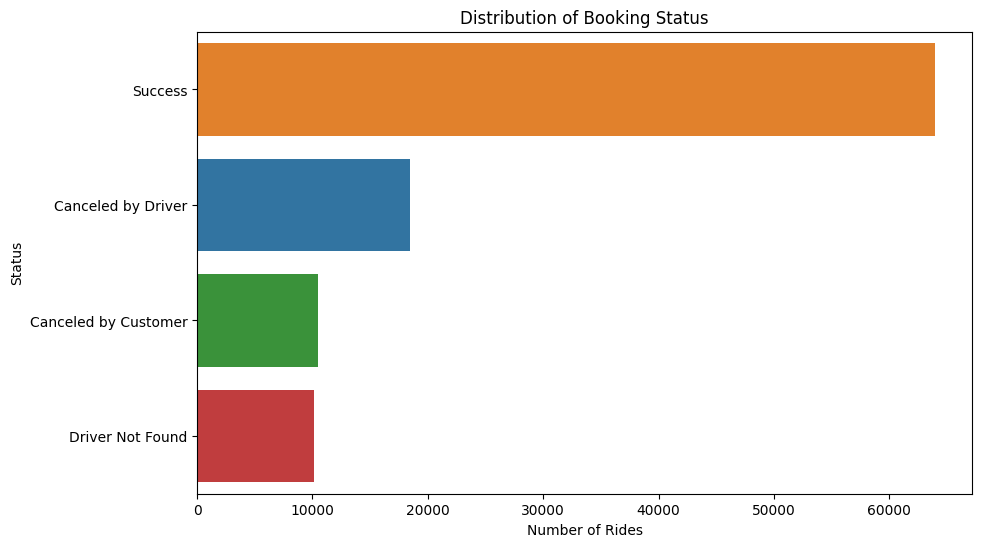

In [42]:
# Visualize Booking_Status
plt.figure(figsize=(10, 6))
sns.countplot(y='Booking_Status', data=df, hue='Booking_Status', order=df['Booking_Status'].value_counts().index)
plt.title('Distribution of Booking Status')
plt.xlabel('Number of Rides')
plt.ylabel('Status')
plt.show()

In [43]:
# Analyze Payment_Method
print("--- Payment Method Distribution ---")
print(df['Payment_Method'].value_counts())

--- Payment Method Distribution ---
Payment_Method
Cash           74079
UPI            25881
Credit Card     2435
Debit Card       629
Name: count, dtype: int64


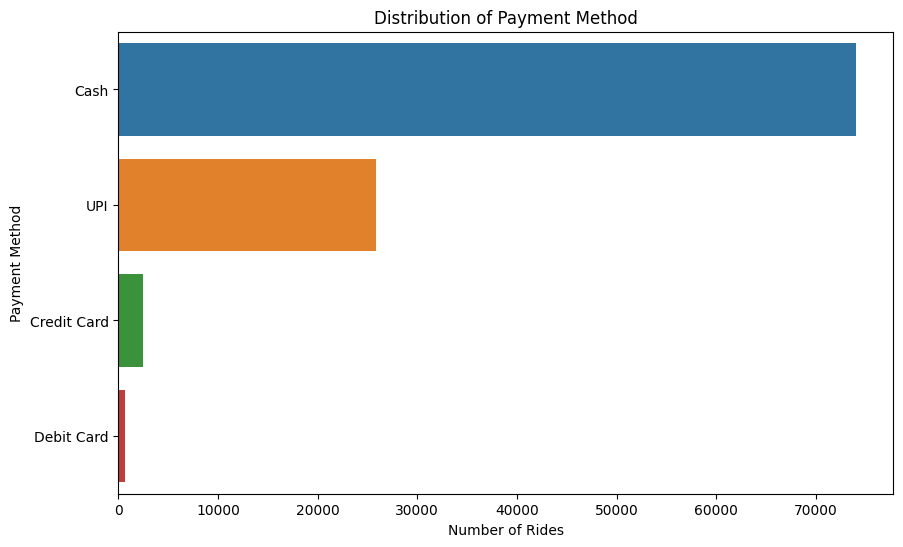

In [44]:
# Visualize Payment_Method
plt.figure(figsize=(10, 6))
sns.countplot(y='Payment_Method', data=df, hue='Payment_Method', order=df['Payment_Method'].value_counts().index)
plt.title('Distribution of Payment Method')
plt.xlabel('Number of Rides')
plt.ylabel('Payment Method')
plt.show()

--- Driver Ratings Summary ---
count    103024.000000
mean          3.998421
std           0.454528
min           3.000000
25%           3.800000
50%           4.000000
75%           4.200000
max           5.000000
Name: Driver_Ratings, dtype: float64

--- Customer Ratings Summary ---
count    103024.000000
mean          3.998953
std           0.456199
min           3.000000
25%           3.800000
50%           4.000000
75%           4.200000
max           5.000000
Name: Customer_Rating, dtype: float64


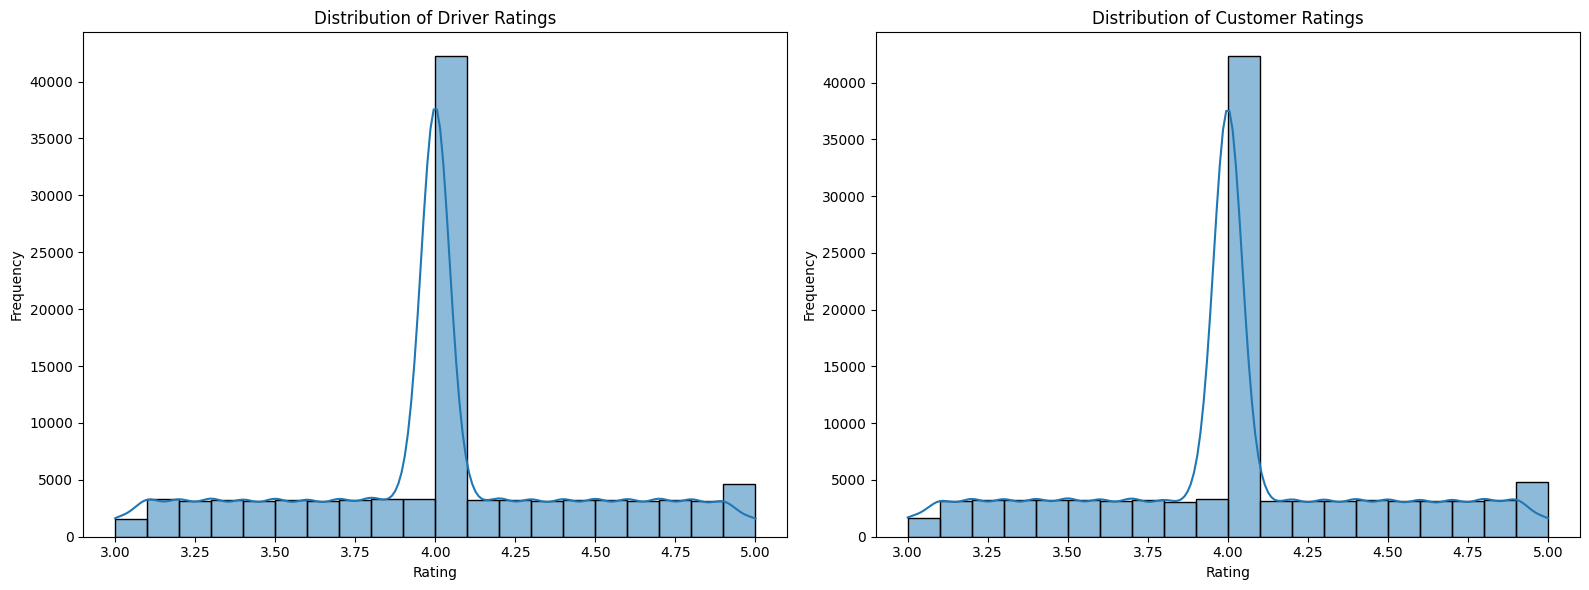

In [45]:
# Describe Driver and Customer Ratings
print("--- Driver Ratings Summary ---")
print(df['Driver_Ratings'].describe())

print("\n--- Customer Ratings Summary ---")
print(df['Customer_Rating'].describe())

# Visualize the distributions with histograms
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Driver Ratings Histogram
sns.histplot(df['Driver_Ratings'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Driver Ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')

# Customer Ratings Histogram
sns.histplot(df['Customer_Rating'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Customer Ratings')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Analysis: Identifying Peak Demand Hours**

In [46]:
# Create 'Hour' and 'DayOfWeek' columns
df['Hour'] = df['Booking_Timestamp'].dt.hour
df['DayOfWeek'] = df['Booking_Timestamp'].dt.day_name()

In [ ]:
# Group by DayOfWeek and Hour to count bookings
demand_data = df.groupby(['DayOfWeek', 'Hour']).size().unstack(fill_value=0)

In [48]:
# Order the days of the week correctly
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
demand_data = demand_data.reindex(day_order)

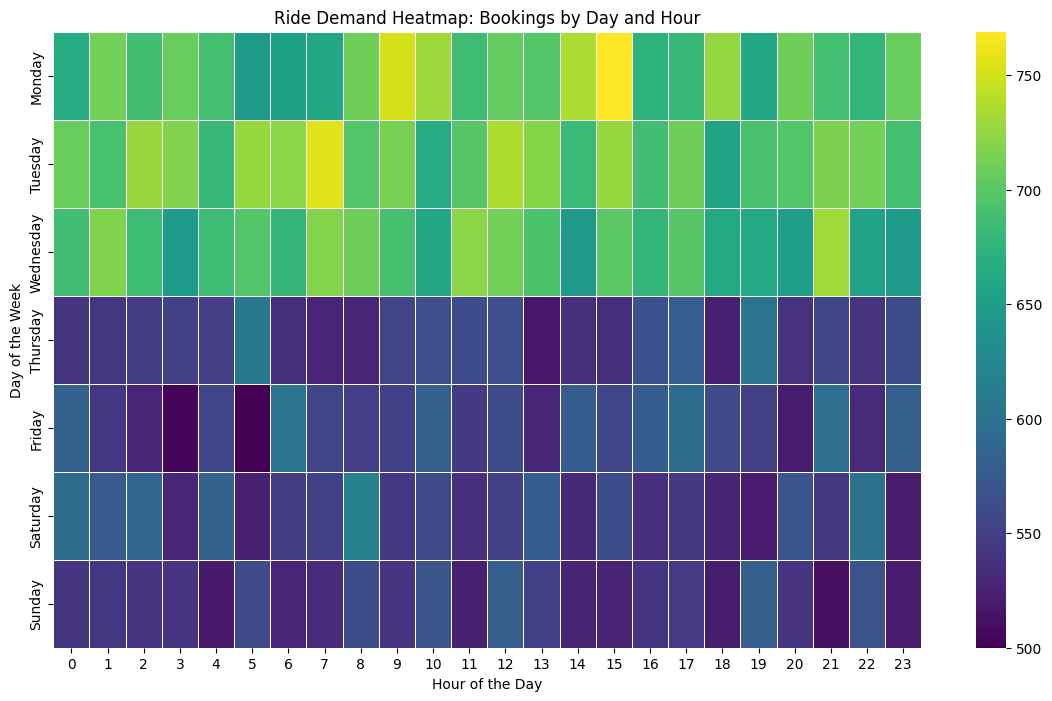

In [49]:
# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(demand_data, cmap='viridis', linewidths=.5)
plt.title('Ride Demand Heatmap: Bookings by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

1. Strong Weekday Focus (Monday - Wednesday)
The business is overwhelmingly concentrated in the first three days of the week. Demand is consistently high from Monday to Wednesday, with several distinct peak periods:

Morning Peak: A significant rush occurs between 8 AM and 10 AM on Tuesday and Monday, likely corresponding to a morning commute.

Midday Peak: Another surge happens around 1 PM to 3 PM on Monday, indicating high demand during lunchtime or for midday travel.

Evening Peak: Demand remains strong into the evening, with a notable peak around 9 PM (21:00) on Monday and Wednesday.

2. The Mid-Week "Demand Cliff"
There is a dramatic and immediate drop in demand starting on Thursday. The entire day shows minimal activity, a stark contrast to the preceding days.

3. Extremely Low Weekend Demand (Friday - Sunday)
Counter-intuitively for a typical ride-sharing service, Friday, Saturday, and Sunday exhibit the lowest demand of the week. This suggests the service is not currently catering to typical weekend activities like nightlife, leisure travel, or errands.

### Business Implications & Recommendations

**driver Optimize Driver Allocation:**
Action: Incentivize drivers to be active during the peak hours on Monday, Tuesday, and Wednesday. This will reduce customer wait times and maximize ride completions.

Action: Significantly scale back driver allocation from Thursday through Sunday to reduce driver idle time and operational costs, unless a strategy is implemented to boost demand.

**Investigate and Strategize for Growth**
Investigate: The sharp drop on Thursday needs to be understood. Is this a data anomaly, or does it reflect a specific business niche (e.g., a service catering only to a specific 3-day event or corporate contract)?

Marketing Opportunity: The virtually untapped weekend market represents a significant growth opportunity. The company should consider running targeted weekend promotions, partnering with local restaurants or event venues, and advertising for leisure-based travel to build a new customer base.

# Detecting anomalies or fraudulent activities in ride data.

*Anomaly 1: High-Value, Low-Distance Rides*

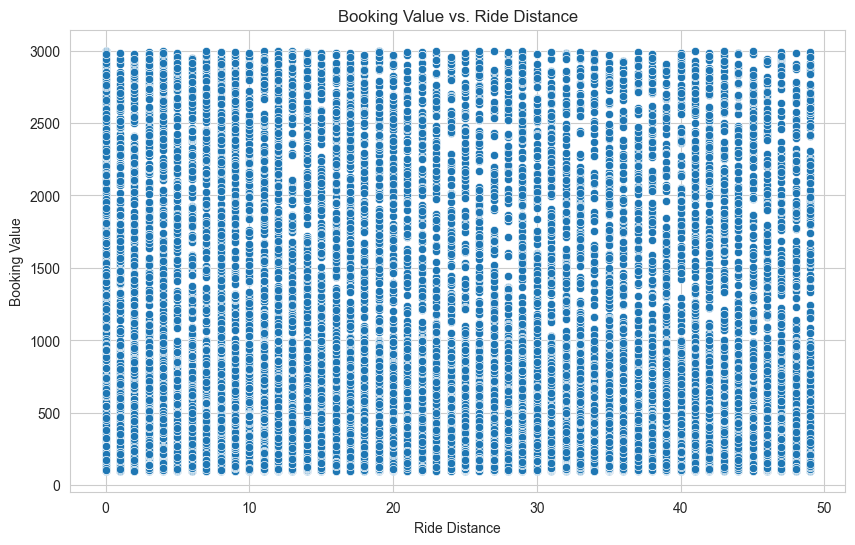

In [50]:
# Set plot style
sns.set_style("whitegrid")
# Create a scatter plot to visually identify outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ride_Distance', y='Booking_Value', data=df)
plt.title('Booking Value vs. Ride Distance')
plt.xlabel('Ride Distance')
plt.ylabel('Booking Value')
plt.show()

In [62]:
# Identify rides with high value but low distance
high_value_threshold = df['Booking_Value'].quantile(0.95) # Top 5% of ride values
low_distance_threshold = 1 # e.g., less than 1 distance unit

potential_fraud_rides = df[(df['Booking_Value'] > high_value_threshold) & (df['Ride_Distance'] < low_distance_threshold)]

print(f"Founded {len(potential_fraud_rides)} rides with unusually high value for a very short distance.")

Founded 1949 rides with unusually high value for a very short distance.


*Anomaly 2: High Customer Cancellation Rates*

In [55]:
# Group by customer and calculate total rides and canceled rides
customer_behavior = df.groupby('Customer_ID').agg(
    total_rides=('Booking_ID', 'count'),
    canceled_rides=('Is_Canceled_by_Customer', 'sum')
).reset_index()

# Calculate the cancellation rate
customer_behavior['cancellation_rate'] = customer_behavior['canceled_rides'] / customer_behavior['total_rides']

# Lower the threshold for total rides from 5 to 1
high_cancellation_users = customer_behavior[(customer_behavior['cancellation_rate'] > 0.5) & (customer_behavior['total_rides'] > 1)]

print(f"Found {len(high_cancellation_users)} customers with a cancellation rate > 50% (and > 1 total ride).")
print(high_cancellation_users.head())

Found 380 customers with a cancellation rate > 50% (and > 1 total ride).
     Customer_ID  total_rides  canceled_rides  cancellation_rate
1076   CID110550            2               2                1.0
1421   CID114003            2               2                1.0
1759   CID117099            2               2                1.0
2583   CID125271            2               2                1.0
2707   CID126419            2               2                1.0


*Anomaly 3: Extremely Low-Rated Rides*

In [60]:
# Find all rides with the lowest possible driver rating
worst_experience_rides = df[df['Driver_Ratings'] == 2]

print(f"\nFound {len(worst_experience_rides)} rides that received a 2-star driver rating.")


Found 0 rides that received a 2-star driver rating.


In [63]:
# Find all rides with the lowest possible driver rating
worst_experience_rides = df[df['Driver_Ratings'] == 3]

print(f"\nFounded {len(worst_experience_rides)} rides that received a 3-star driver rating.")


Founded 1560 rides that received a 3-star driver rating.


# Analyzing customer behavior for personalized marketing strategies.

In [64]:
# Set a snapshot date for analysis (today's date)
snapshot_date = pd.to_datetime('2025-09-17')

# Calculate RFM values
rfm_df = df.groupby('Customer_ID').agg({
    'Booking_Timestamp': lambda date: (snapshot_date - date.max()).days,
    'Booking_ID': 'count',
    'Booking_Value': 'sum'
})

# Rename columns for clarity
rfm_df.rename(columns={'Booking_Timestamp': 'Recency',
                    'Booking_ID': 'Frequency',
                    'Booking_Value': 'Monetary'}, inplace=True)

print("--- Raw RFM Values (First 5 Customers) ---")
print(rfm_df.head())

--- Raw RFM Values (First 5 Customers) ---
             Recency  Frequency  Monetary
Customer_ID                              
CID100033        429          1       374
CID100034        414          1      2139
CID100043        420          1       357
CID100046        421          1       385
CID100050        413          1       191


In [65]:
# Create RFM scores by dividing customers into quartiles
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1]) # Lower recency is better
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4])

# Define segmentation logic
def segment_customer(row):
    if row['R_Score'] == 4 and row['F_Score'] == 4:
        return 'Champions'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3:
        return 'Loyal Customers'
    elif row['R_Score'] <= 2 and row['F_Score'] >= 3:
        return 'At-Risk Customers'
    elif row['R_Score'] == 4 and row['F_Score'] == 1:
        return 'New Customers'
    elif row['R_Score'] <= 2 and row['F_Score'] <= 2:
        return 'Hibernating'
    return 'Regular'

# Apply the segmentation
rfm_df['Segment'] = rfm_df.apply(segment_customer, axis=1)

print("\n--- Customer Segments (First 5 Customers) ---")
print(rfm_df.head())


--- Customer Segments (First 5 Customers) ---
             Recency  Frequency  Monetary R_Score F_Score M_Score  \
Customer_ID                                                         
CID100033        429          1       374       2       1       2   
CID100034        414          1      2139       4       1       4   
CID100043        420          1       357       3       1       2   
CID100046        421          1       385       3       1       2   
CID100050        413          1       191       4       1       1   

                   Segment  
Customer_ID                 
CID100033      Hibernating  
CID100034    New Customers  
CID100043          Regular  
CID100046          Regular  
CID100050    New Customers  


* **Personalized Marketing Strategies**

Champions:-
Behavior: Your most valuable customers. They book often, recently, and spend a lot.

**Strategy: Reward them. Offer loyalty perks, exclusive access to new vehicle types, or a "thank you" gift. Avoid bombarding them with discounts they don't need.**

Loyal Customers:-
Behavior: They are frequent and recent riders who form the backbone of your business.

**Strategy: Nurture and upsell. Engage them with community content and offer them packages or subscriptions to lock in their loyalty (like, "Buy a 10-ride pass and save 15%").**

At-Risk Customers:-
Behavior: They used to be frequent riders but haven't booked in a while. They are at risk of churning.

**Strategy: Win them back. Send a personalized "We miss you!" campaign with a special, time-sensitive offer to encourage their next ride.**

New Customer:-
Behavior: They just took their first ride recently.

**Strategy: Make a great second impression. Nurture them with a welcome email series and offer a small incentive for their second or third ride to build a habit.**

hibernating Hibernating:-
Behavior: Low-frequency customers who haven't booked in a long time.

**Strategy: Re-engage or let go. You can try a last-ditch aggressive promotional offer. If they don't respond, consider removing them from active marketing lists to save costs.**

# Understanding pricing patterns and surge pricing effectiveness. 

In [66]:
# Avoid division by zero by replacing 0 distance with a very small number or 1
df['Ride_Distance_Clean'] = df['Ride_Distance'].replace(0, 1)

# Create the new feature
df['Price_Per_Unit_Distance'] = df['Booking_Value'] / df['Ride_Distance_Clean']

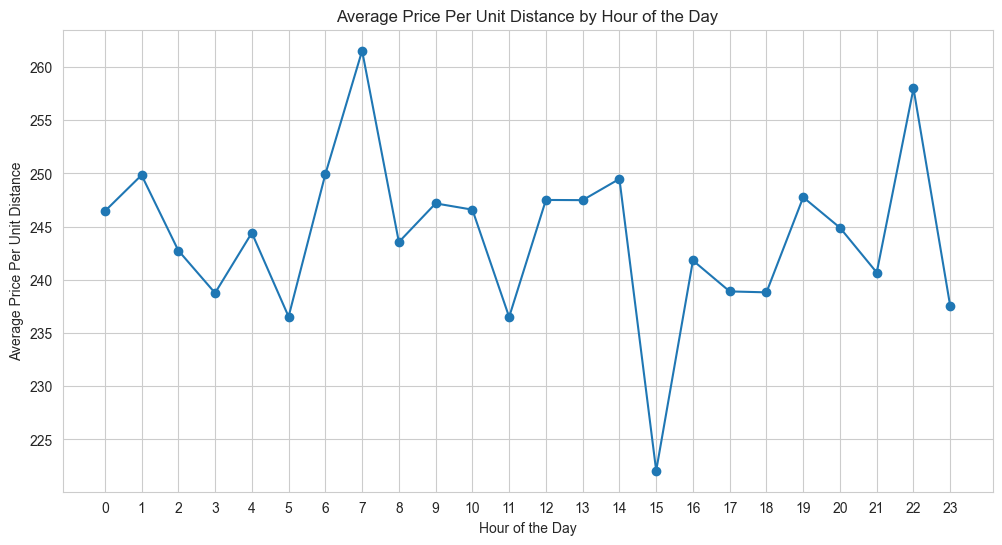

In [67]:
# Set plot style
sns.set_style("whitegrid")

# Group by hour and calculate the mean
avg_price_by_hour = df.groupby('Hour')['Price_Per_Unit_Distance'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
avg_price_by_hour.plot(kind='line', marker='o', linestyle='-')
plt.title('Average Price Per Unit Distance by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price Per Unit Distance')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Midday Pricing Failure:**
This is the most critical issue. The demand heatmap showed a major peak between 1 PM and 3 PM (13:00-15:00). However, this price chart shows that prices hit their absolute lowest point at 3 PM (15:00). This system is charging the least when demand is high, which is the exact opposite of an effective surge strategy.

**Morning Peak Misalignment:**
The demand heatmap identified the morning rush between 8 AM and 10 AM. Your price chart shows a sharp price peak at 7 AM, an hour before the main rush begins. The price then drops during the actual 8-10 AM peak. This means the surge is timed incorrectly and misses the main wave of demand.

**Evening Peak Misalignment:**
Similarly, demand peaked around 9 PM (21:00). This chart shows the corresponding price peak occurring an hour later at 10 PM (22:00). The price increase is reactive and comes too late, again missing the moment of highest demand.

### *Business Recommendations*

**Recalibrate the Pricing Algorithm:** pricing logic needs to be fundamentally reviewed and adjusted. The goal should be to ensure that price peaks directly overlap with the known demand peaks: 8-10 AM, 1-3 PM, and 9 PM on weekdays.

**Investigate the Midday Anomaly:** The price drop during the midday rush is a serious flaw. This could be a bug or a poorly configured rule in pricing system that requires immediate technical investigation.

**Implement a Proactive Model:** The current system appears to react too slowly to demand changes. An effective model should anticipate these recurring peaks and adjust prices proactively just as the rush begins, not after it has already peaked.

# DOWNLOAD THE CLEANED OLA_RIDE DATASET

In [68]:
df.to_csv('cleaned_OLAride_data.csv', index=False)

print("File 'cleaned_OLAride_data.csv' has been saved successfully.")

File 'cleaned_OLAride_data.csv' has been saved successfully.


In [74]:
import pandas as pd
from sqlalchemy import create_engine

db_host = "localhost"
db_name = "OLA_DB"
db_user = "postgres"
db_password = "Admin"
db_port = "5432"


db_url = f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# Create the database engine
try:
    engine = create_engine(db_url)
    print("Database engine created successfully.")
except Exception as e:
    print(f"Error creating database engine: {e}")

# Write DataFrame to a new SQL table

try:
    
    df.to_sql(
        'cleaned_OLAride_data',  # Table name
        con=engine,
        if_exists='replace', # Options: 'replace', 'append', 'fail'
        index=False          # not write the pandas index as a column
    )
    print("DataFrame successfully written to the 'cleaned_OLAride_data' table in PostgreSQL.")
except Exception as e:
    print(f"Error writing DataFrame to SQL: {e}")

Database engine created successfully.
DataFrame successfully written to the 'cleaned_OLAride_data' table in PostgreSQL.
